In [18]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import pandas as pd
import healpy as hp
import time
import warnings
from pixell import reproject
from classy import Class
%matplotlib inline
import ST 

In [3]:
res2048_arcmin = hp.nside2resol(2048, arcmin=True)
res1024_arcmin = hp.nside2resol(1024, arcmin=True)
res_0512_arcmin = hp.nside2resol(512, arcmin=True)
res_0256_arcmin = hp.nside2resol(256, arcmin=True)
res_2048 = hp.nside2resol(2048, arcmin=False)
res_1024 = hp.nside2resol(1024, arcmin=False)
res_0512 = hp.nside2resol(512, arcmin=False)
res_0256 = hp.nside2resol(256, arcmin=False)

In [4]:
cmap = plt.cm.RdBu

In [56]:
c__256 = 'C0'
c__512 = 'C1'
c_1024 = 'C2'
c_proj = 'C2'
c_fgen = 'C3'

# SZ Map

In [48]:
map_sz_0256 = hp.read_map("/Users/arefe/Projects/ScatteringTransform/maps/COM_CompMap_SZ-commander_0256_R2.00.fits")

In [72]:
map_sz = hp.read_map ("/Users/arefe/Projects/ScatteringTransform/maps/COM_CompMap_Compton-SZMap-milca-ymaps_2048_R2.00.fits")
#map_sz = hp.read_map("/Users/arefe/Projects/ScatteringTransform/maps/COM_CompMap_SZ-commander_0256_R2.00.fits")

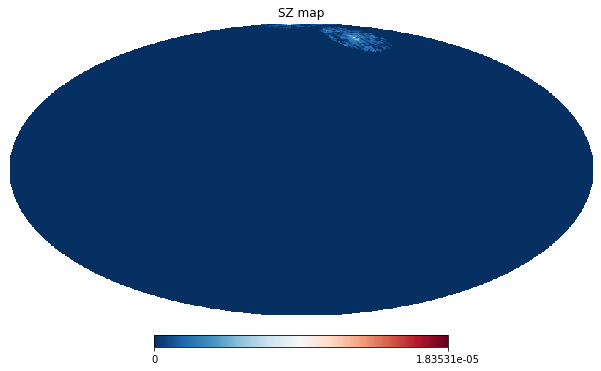

In [58]:
#vmax = max(abs(map_sz_256.min()), abs(map_sz_256.max()))

hp.mollview(map_sz_0256  ,title="SZ map" , cmap = 'RdBu_r')


In [50]:
nside_0256 = hp.pixelfunc.get_nside(map_sz_0256)
print (nside_0256)

256


In [79]:
nside = 2048

In [73]:
cl_sz = hp.anafast(map_sz)

In [10]:
cl_sz_0256 = hp.anafast(map_sz_0256)

In [74]:
lmax=np.shape(cl_sz)[0]
ell=np.arange(0,lmax)
norm = ell * (ell+1) / (2*np.pi)
dl_sz = cl_sz*norm

In [12]:
lmax_0256=np.shape(cl_sz_0256)[0]
ell_0256=np.arange(0,lmax_0256)
norm_0256 = ell_0256 * (ell_0256+1) / (2*np.pi)
dl_sz_0256 = cl_sz_0256*norm_0256

<ipython-input-75-3065c00bde98>:1: RuntimeWarning: divide by zero encountered in true_divide
  ellsc = 360*60/ell
<ipython-input-75-3065c00bde98>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(ellsc,np.log(dl_sz))


Text(0, 0.5, '$D_l$')

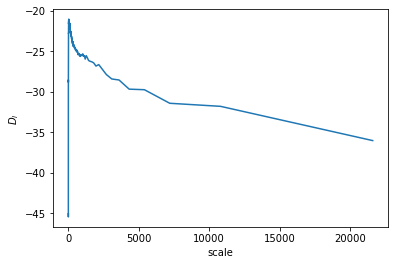

In [75]:
ellsc = 360*60/ell
#ellsc = ellsc[::-1]
plt.plot(ellsc,np.log(dl_sz))
plt.xlabel("scale")
plt.ylabel("$D_l$")

In [80]:
resol_sz = hp.nside2resol(nside, arcmin=False )
print (resol_sz)

0.0004996712441144963


In [14]:
resol_0256 = hp.nside2resol(nside_0256 , arcmin = False )
resol_0256_arcmin = hp.nside2resol(nside_0256 , arcmin=True)

In [15]:
jmax = 10 
theta_bin = 10000

In [81]:
mor_l = ST.morlet_arr (resol_sz, jmax , lmax, theta_bin)
gaus_l = ST.gaus_arr (resol_sz, jmax, lmax, theta_bin)

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1242: ComplexWarning: Casting complex values to real discards the imaginary part
  window[0] = trapz(beam * p0 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1243: ComplexWarning: Casting complex values to real discards the imaginary part
  window[1] = trapz(beam * p1 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1247: ComplexWarning: Casting complex values to real discards the imaginary part
  window[l] = trapz(beam * p2 * st, theta)


In [19]:
mor_l_0256 = ST.morlet_arr (resol_0256, jmax , lmax_0256, theta_bin)
gaus_l_0256 = ST.gaus_arr (resol_0256, jmax, lmax_0256, theta_bin)

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1242: ComplexWarning: Casting complex values to real discards the imaginary part
  window[0] = trapz(beam * p0 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1243: ComplexWarning: Casting complex values to real discards the imaginary part
  window[1] = trapz(beam * p1 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1247: ComplexWarning: Casting complex values to real discards the imaginary part
  window[l] = trapz(beam * p2 * st, theta)


In [82]:
%%time 
s1_sz , i1_sz = ST.compS1 (map_sz , mor_l, jmax,  nside )

0
1
2
3
4
5
6
7
8
9
CPU times: user 12min 36s, sys: 12.6 s, total: 12min 49s
Wall time: 3min 55s


In [21]:
%%time 
s1_sz_0256 , i1_sz_0256 = ST.compS1 (map_sz_0256 , mor_l_0256, jmax, nside_0256 )

0
1
2
3
4
5
6
7
8
9
CPU times: user 2.34 s, sys: 99.5 ms, total: 2.44 s
Wall time: 903 ms


Text(0, 0.5, 'log(S1)')

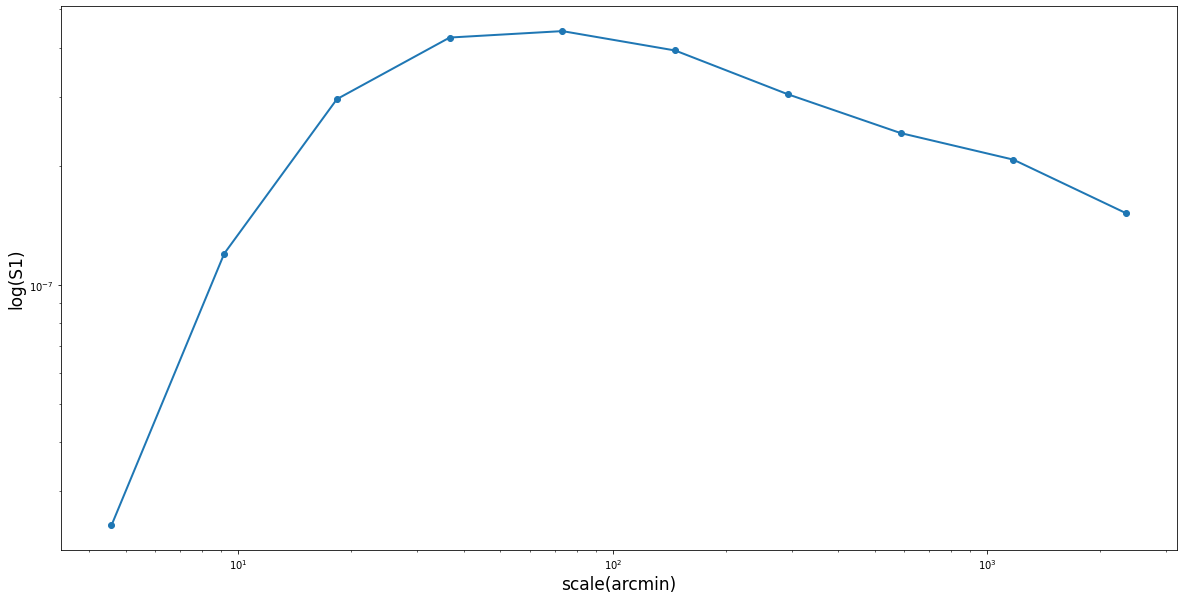

In [87]:
Jf=np.arange(jmax)
scale=2**Jf*((2*res2048_arcmin)/0.75)

plt.figure(figsize=(20,10))
plt.loglog (scale,s1_sz,'o-' , linewidth = 2)
plt.xlabel("scale(arcmin)" , fontsize = 17)
plt.ylabel("log(S1)" , fontsize =17)

In [88]:
map_sz_out = hp.synfast (cl_sz,2048)

In [22]:
map_sz_0256_out = hp.synfast (cl_sz_0256,nside_0256)

In [23]:
cl_sz_0256_out = hp.anafast (map_sz_0256_out)

In [45]:
fig = plt.figure (figsize = (20,10))
dl_sz_out = norm*cl_sz_out
plt.loglog(ellsc,dl_sz)
#plt.loglog(ellsc , dl_sz_out)
plt.xlabel("scale")
plt.ylabel("$D_l$")
plt.legend (["SZ map" , "Regenerated SZ map"])
print (np.max(dl_sz))
print (np.max(dl_sz_out))

NameError: name 'norm' is not defined

<Figure size 1440x720 with 0 Axes>

In [89]:
s1_sz_out , i1_sz_out = ST.compS1 (map_sz_out, mor_l,  jmax,  nside )

0
1
2
3
4
5
6
7
8
9


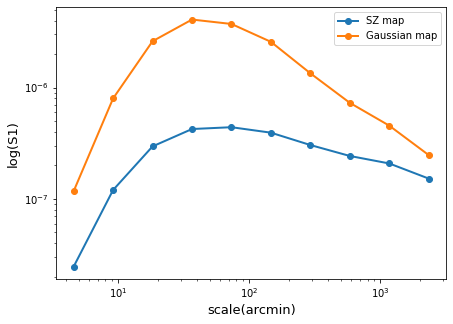

In [95]:
Jf=np.arange(jmax)
scale=2**Jf*((2*res2048_arcmin)/0.75)

plt.figure(figsize=(7,5))
plt.loglog (scale,s1_sz,'o-' , linewidth = 2)
plt.loglog (scale,s1_sz_out,'o-' , linewidth = 2)
plt.xlabel("scale(arcmin)" , fontsize = 13)
plt.ylabel("log(S1)" , fontsize =13)
plt.legend (["SZ map" , "Gaussian map"])

In [24]:
s1_sz_0256_out , i1_sz_0256_out = ST.compS1 (map_sz_0256_out, mor_l_0256,  jmax,  nside_0256 )

0
1
2
3
4
5
6
7
8
9


<ipython-input-107-4a2aa96218b4>:6: RuntimeWarning: divide by zero encountered in log
  plt.plot (ellsc , np.log (dl_sz))


Text(0, 0.5, '$log(Sl)$')

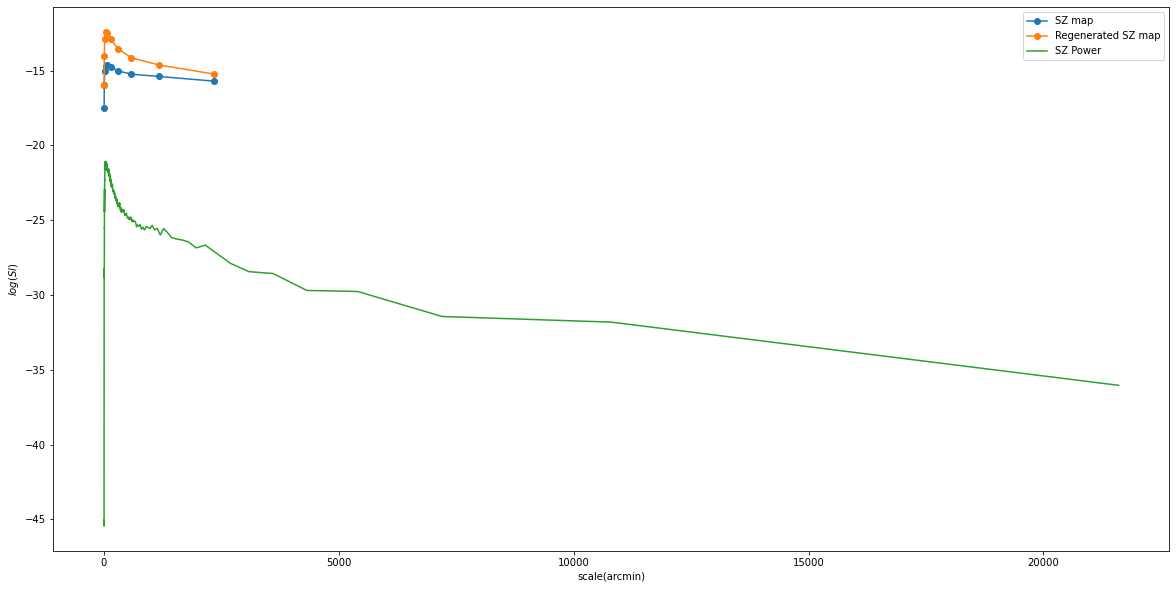

In [107]:
plt.figure(figsize=(20,10))
#plt.plot (scale,s1_sz,'o-')
#plt.plot (scale,s1_sz_out,'o-')
plt.plot (scale,np.log(s1_sz),'o-')
plt.plot(scale,np.log(s1_sz_out),'o-')
plt.plot (ellsc , np.log (dl_sz))
plt.legend(["SZ map", "Regenerated SZ map","SZ Power"])
plt.xlabel("scale(arcmin)")
plt.ylabel("$log(Sl)$")

Text(0, 0.5, '$log(Sl)$')

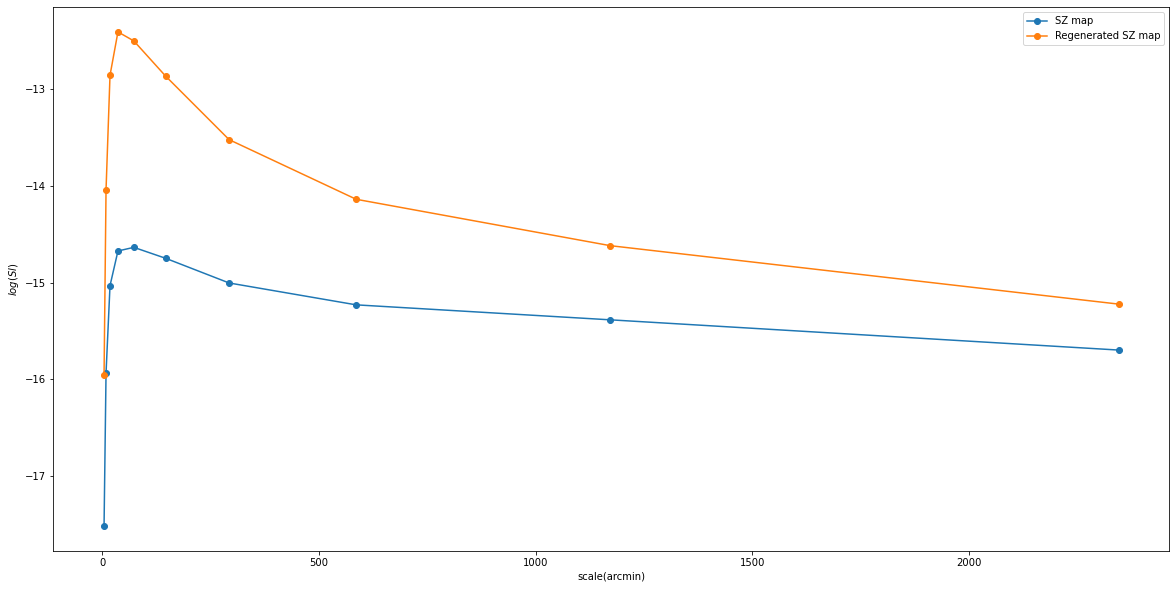

In [109]:
plt.figure(figsize=(20,10))
#plt.plot (scale,s1_sz,'o-')
#plt.plot (scale,s1_sz_out,'o-')
plt.plot (scale,np.log(s1_sz),'o-')
plt.plot(scale,np.log(s1_sz_out),'o-')
#plt.plot (ellsc , np.log (dl_sz))
plt.legend(["SZ map", "Regenerated SZ map"])
plt.xlabel("scale(arcmin)")
plt.ylabel("$log(Sl)$")

Text(0, 0.5, '$Sl$')

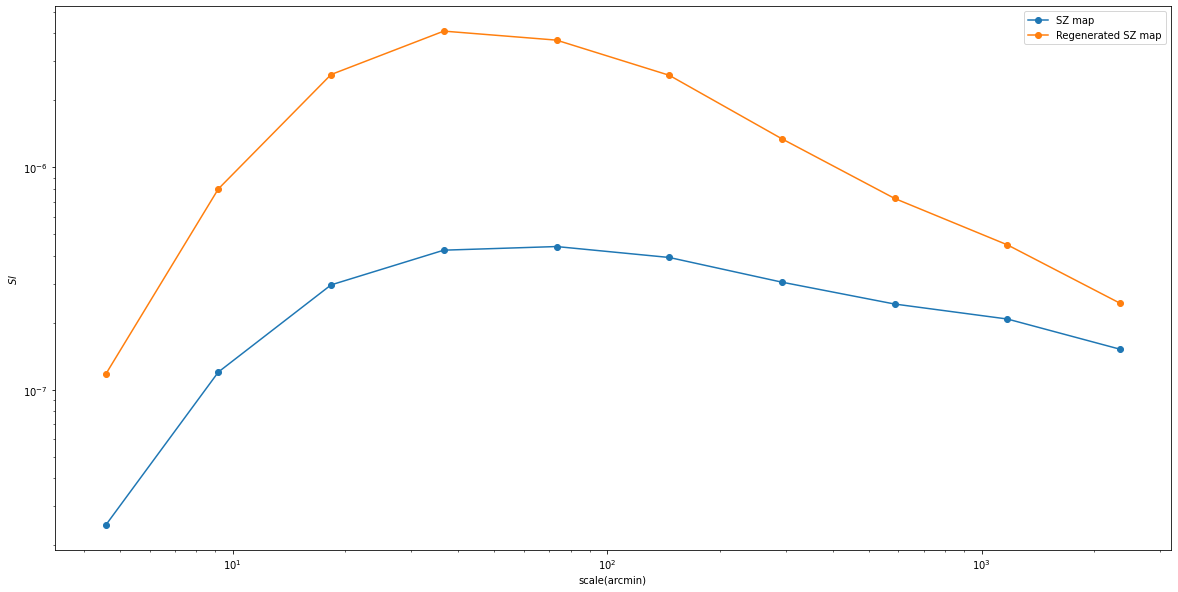

In [103]:
plt.figure(figsize=(20,10))
#plt.plot (scale,s1_sz,'o-')
#plt.plot (scale,s1_sz_out,'o-')
plt.loglog (scale,s1_sz,'o-')
plt.loglog(scale,s1_sz_out,'o-')
plt.legend(["SZ map", "Regenerated SZ map"])
plt.xlabel("scale(arcmin)")
plt.ylabel("$Sl$")

Text(0, 0.5, '$Sl$')

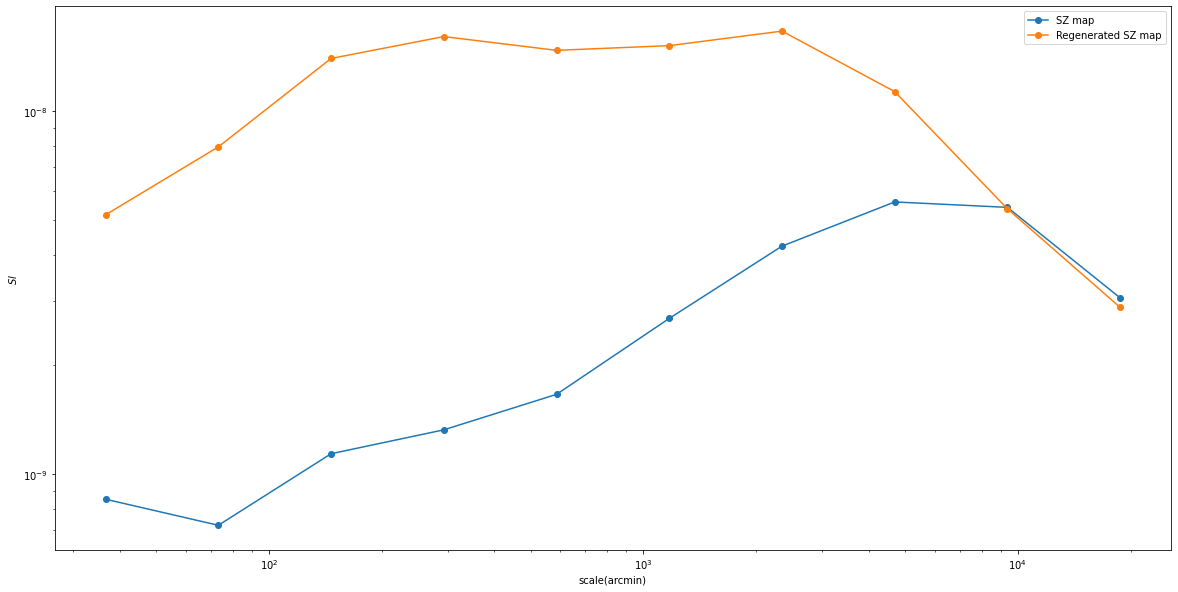

In [60]:
plt.figure(figsize=(20,10))
#plt.plot (scale,s1_sz,'o-')
#plt.plot (scale,s1_sz_out,'o-')
plt.loglog (scale_0256,s1_sz_0256,'o-')
plt.loglog(scale_0256,s1_sz_0256_out,'o-')
plt.legend(["SZ map", "Regenerated SZ map"])
plt.xlabel("scale(arcmin)")
plt.ylabel("$Sl$")

Text(0, 0.5, '$Sl$')

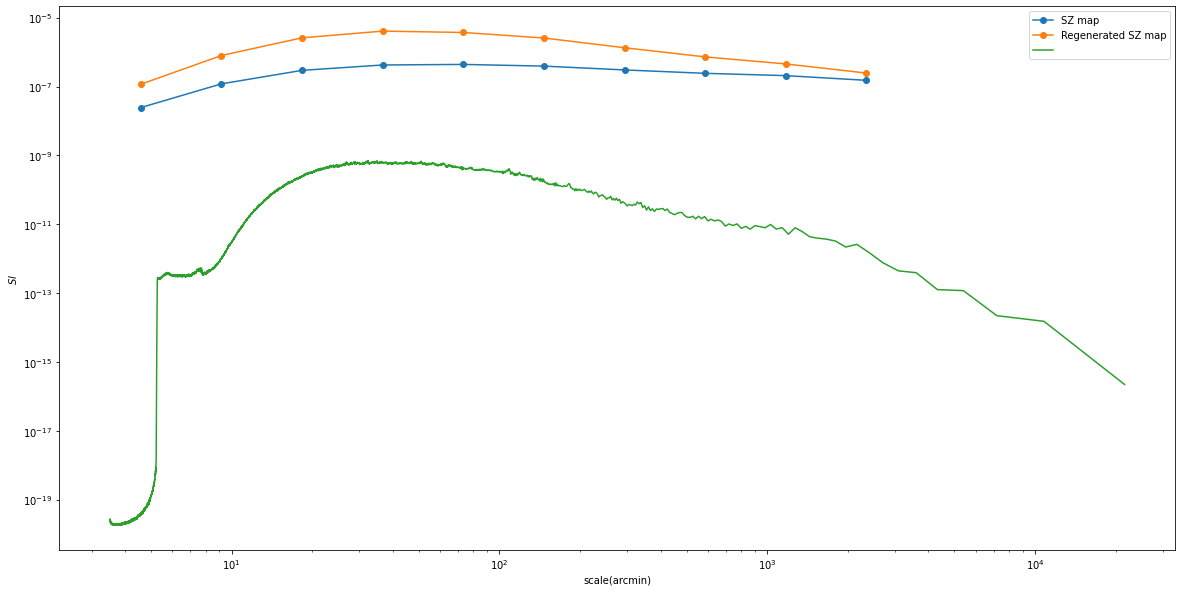

In [96]:
plt.figure(figsize=(20,10))
#plt.plot (scale,s1_sz,'o-')
#plt.plot (scale,s1_sz_out,'o-')
plt.loglog (scale,s1_sz,'o-')
plt.loglog(scale,s1_sz_out,'o-')
plt.loglog(ellsc , dl_sz)
plt.legend(["SZ map", "Regenerated SZ map" , ""])
plt.xlabel("scale(arcmin)")
plt.ylabel("$Sl$")

In [ ]:
dl_sz_out = dl_sz
plt.figure(figsize=(20,10))
#plt.plot (scale,s1_sz,'o-')
#plt.plot (scale,s1_sz_out,'o-')
#plt.loglog (scale,s1_sz,'o-')
#plt.loglog(scale,s1_sz_out,'o-')
plt.loglog(ellsc , dl_sz)
plt.loglog(ellsc , dl_sz_out)

plt.legend(["SZ map", "Regenerated SZ map" , ""])
plt.xlabel("scale(arcmin)")
plt.ylabel("$Sl$")

Text(0, 0.5, '$Sl$')

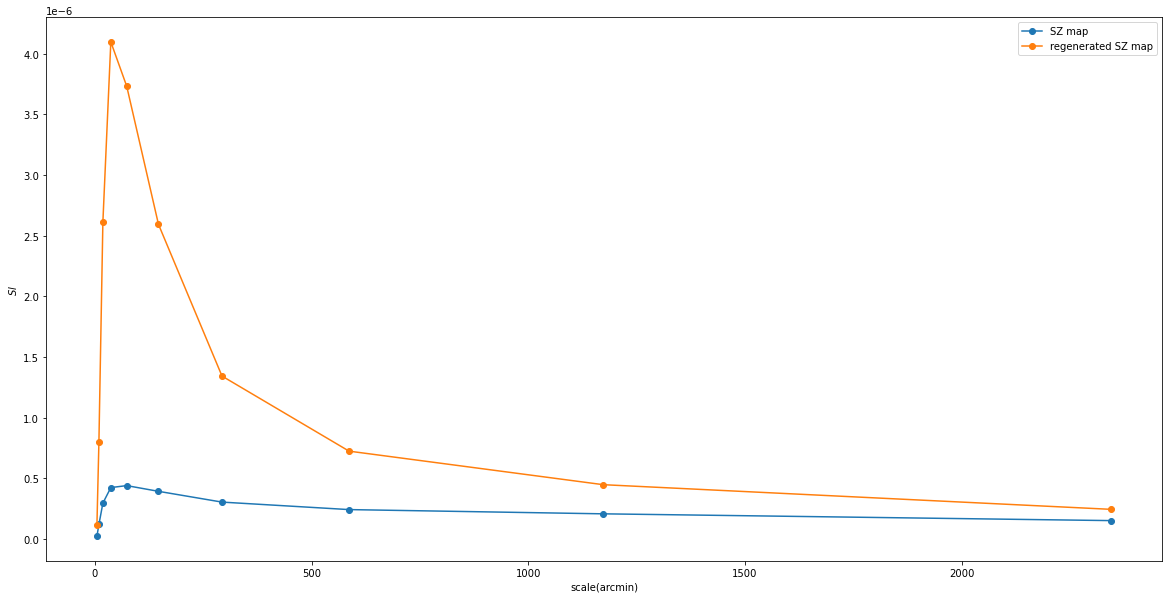

In [93]:
Jf=np.arange(jmax)
scale=2**Jf*((2*res2048_arcmin)/0.75)

plt.figure(figsize=(20,10))
plt.plot (scale,s1_sz,'o-')
plt.plot (scale,s1_sz_out,'o-')
#plt.plot (scale,np.log(s1_sz_out_alm),'o-')
#plt.plot(ellsc,np.log(dl_sz))
plt.legend(["SZ map", "Regenerated SZ map"])
plt.xlabel("scale(arcmin)")
plt.ylabel("$Sl$")

Text(0, 0.5, '$Sl$')

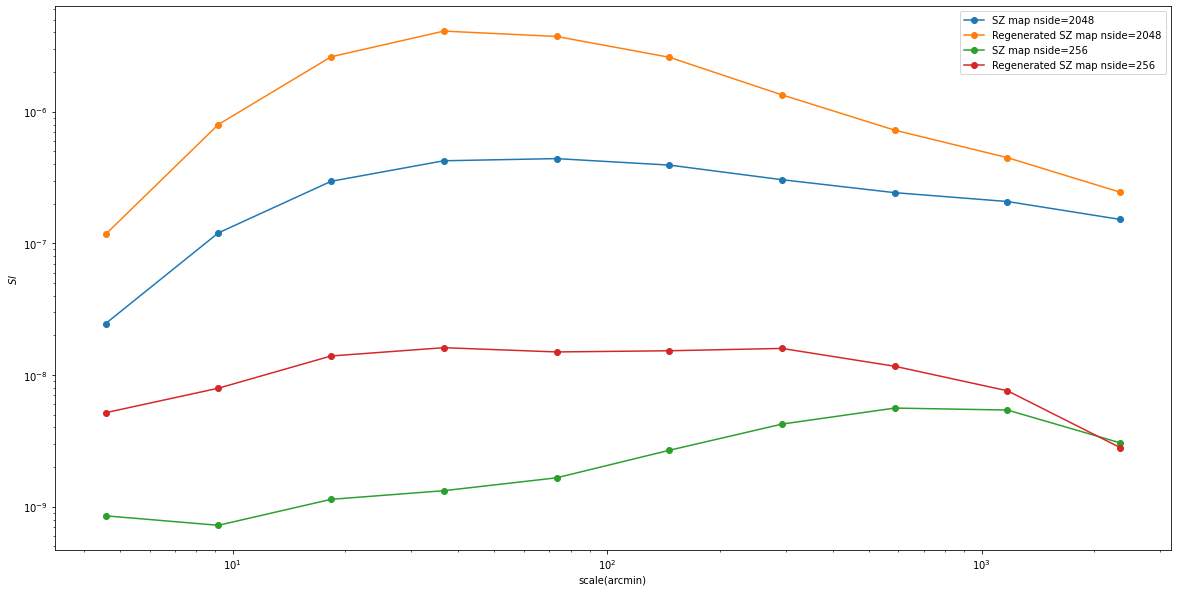

In [116]:
Jf=np.arange(jmax)
scale_0256=2**Jf*((2*resol_0256_arcmin)/0.75)

plt.figure(figsize=(20,10))
plt.loglog (scale,s1_sz,'o-')
plt.loglog (scale,s1_sz_out,'o-')
plt.loglog (scale,s1_sz_0256,'o-')
plt.loglog (scale,s1_sz_0256_out,'o-')
#plt.loglog(ellsc , dl_sz)
#plt.plot (scale,np.log(s1_sz_out_alm),'o-')
#plt.plot(ellsc,np.log(dl_sz))
plt.legend(["SZ map nside=2048", "Regenerated SZ map nside=2048" ,"SZ map nside=256", "Regenerated SZ map nside=256"])
plt.xlabel("scale(arcmin)")
plt.ylabel("$Sl$")

In [21]:
%%time 
s2_sz  = s1.compS2 (map_sz , i1_sz, mor_l, gaus_l , resol_sz, jmax, lmax , nside )

0
1
2
3
4
5
6
7
8
9
CPU times: user 6h 3min 22s, sys: 6min 59s, total: 6h 10min 22s
Wall time: 3h 45min 24s


In [26]:
%%time 
s2_sz_0256 , i2_sz_0256  = ST.compS2 ( i1_sz_0256, mor_l_0256, jmax,  nside_0256 )

0
1
2
3
4
5
6
7
8
9
CPU times: user 23.8 s, sys: 725 ms, total: 24.5 s
Wall time: 7.04 s


In [27]:
%%time 
s2_sz_0256_out , i2_sz_0256_out  = ST.compS2 ( i1_sz_0256_out, mor_l_0256, jmax,  nside_0256 )

0
1
2
3
4
5
6
7
8
9
CPU times: user 23.8 s, sys: 676 ms, total: 24.5 s
Wall time: 6.82 s


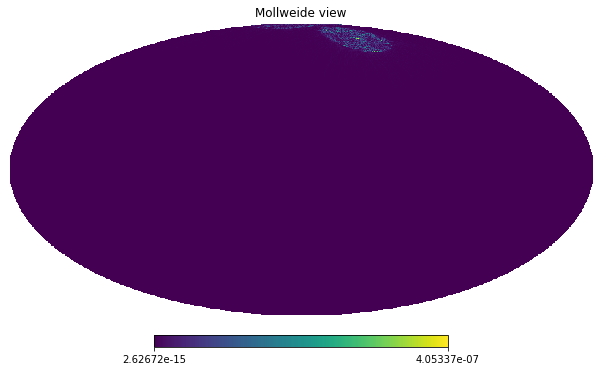

In [31]:
hp.mollview(i1_sz_0256[0] , min = 1e-15 , max = )

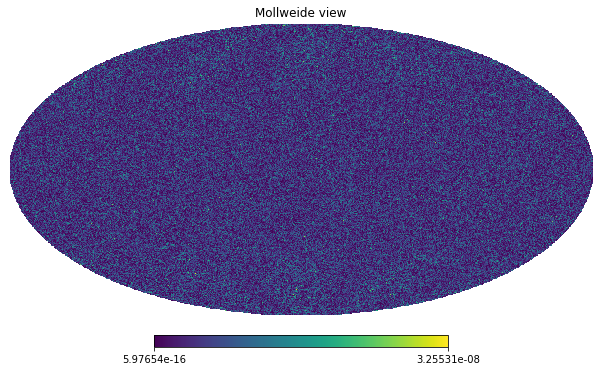

In [32]:
hp.mollview(i1_sz_0256_out[0])

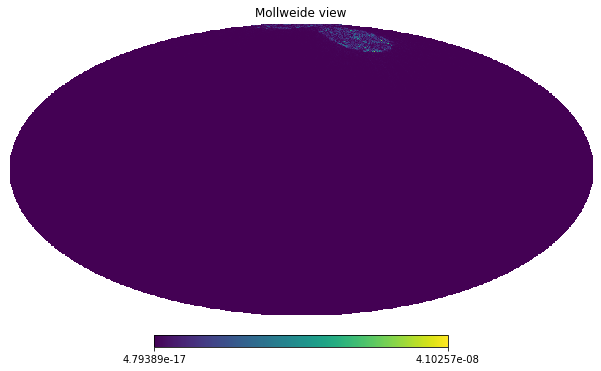

In [29]:
hp.mollview(i2_sz_0256[0][1])

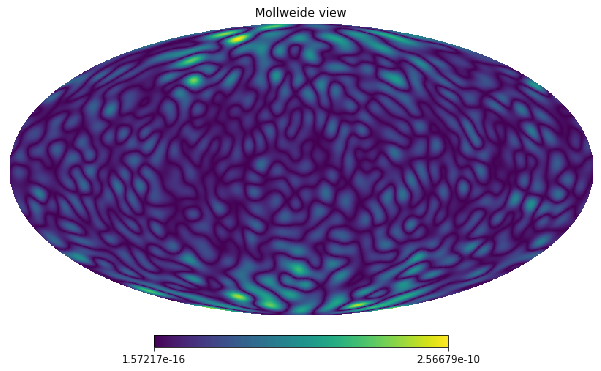

In [34]:
hp.mollview(i2_sz_0256_out[0][])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


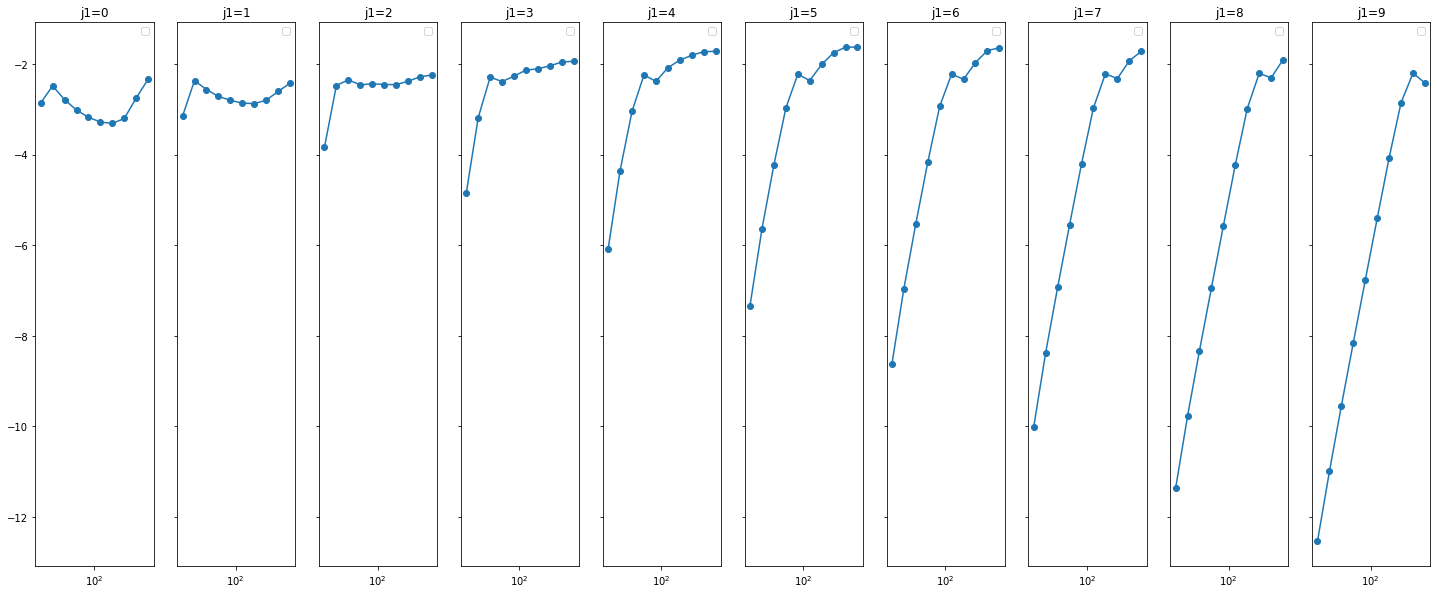

In [22]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale,np.log(s2_sz[j,:]/s1_sz[j]),'o-')
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


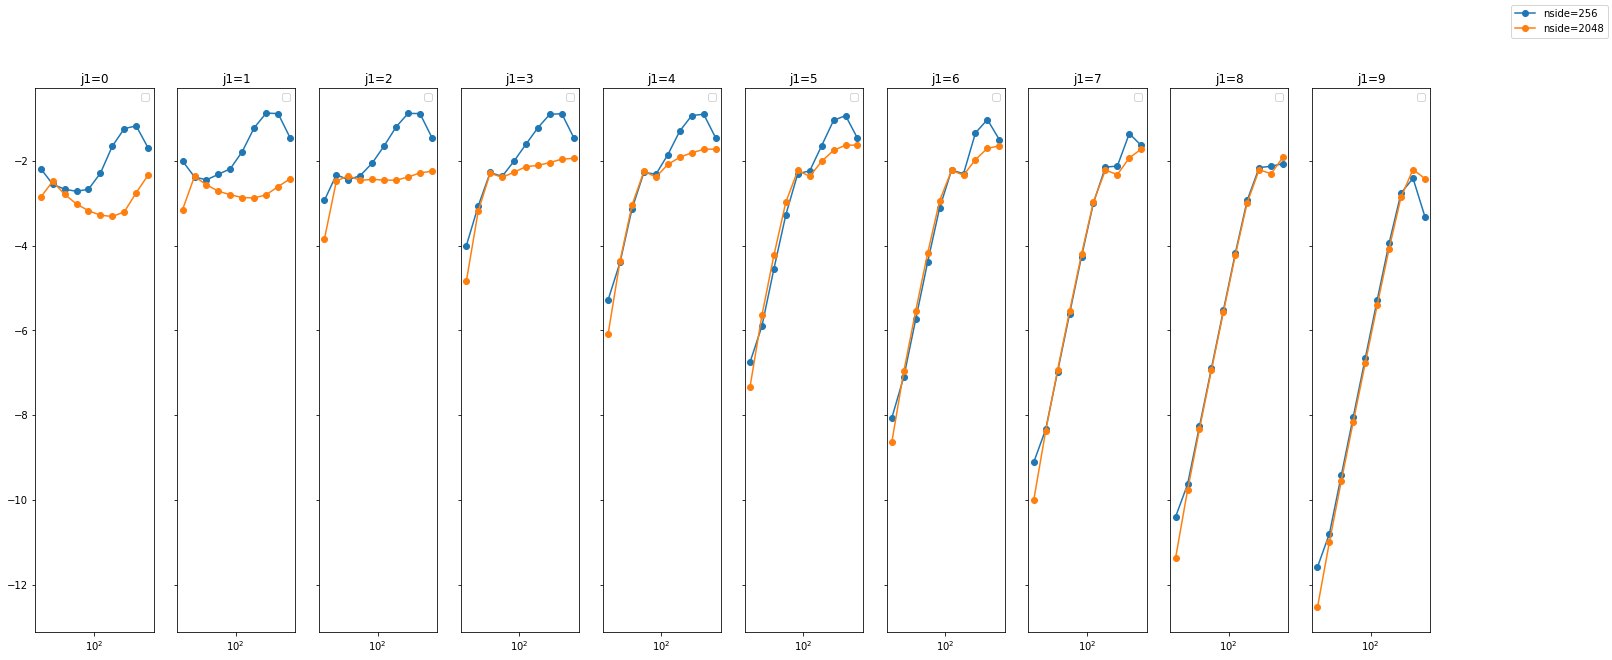

In [125]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale,np.log(s2_sz_0256[j,:]/s1_sz_0256[j]),'o-')
    ax[j].plot (scale,np.log(s2_sz[j,:]/s1_sz[j]),'o-')
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()
fig.legend (["nside=256" ,"nside=2048"])

In [37]:
Jf=np.arange(jmax)
scale_0256=2**Jf*((2*resol_0256_arcmin)/0.75)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


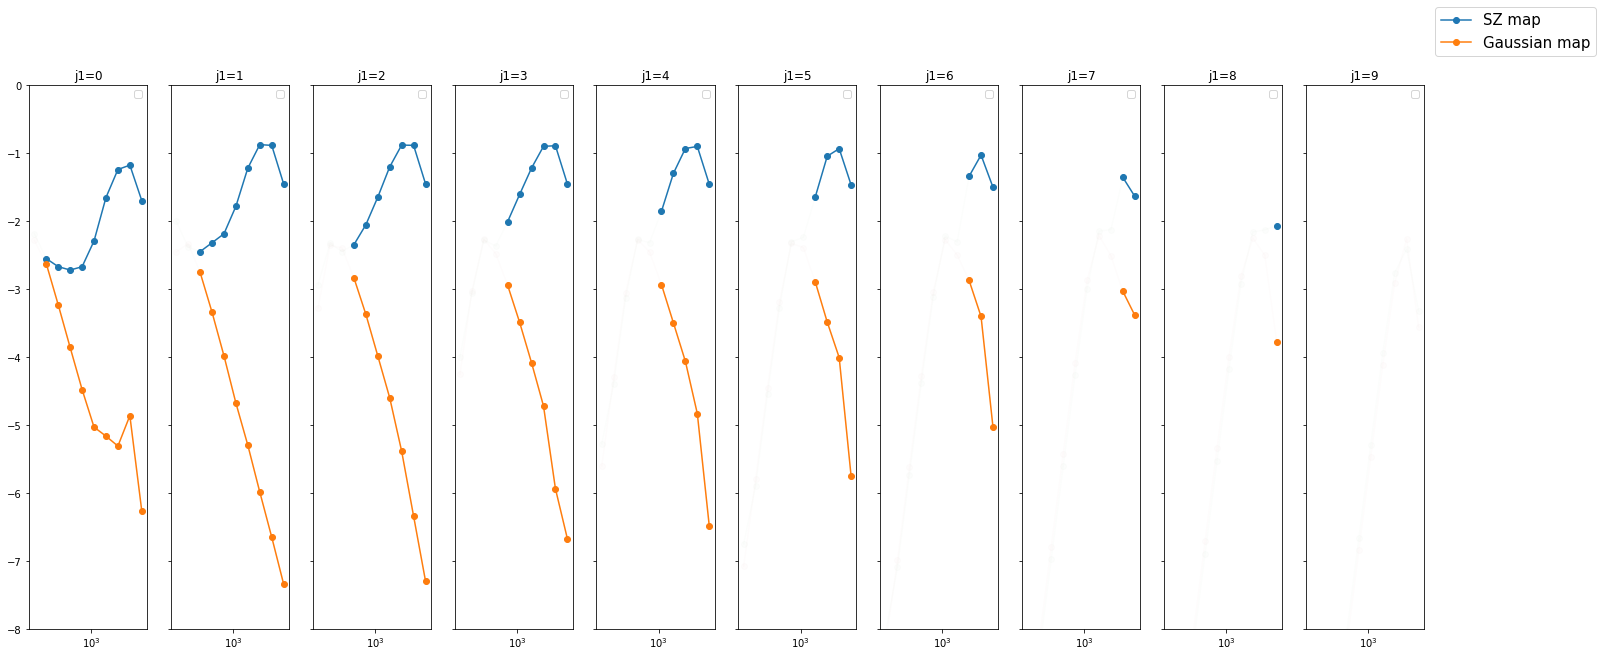

In [68]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale_0256[j+1:],np.log(s2_sz_0256[j,j+1:]/s1_sz_0256[j]),'o-' , alpha = 1)
    ax[j].plot (scale_0256[j+1:],np.log(s2_sz_0256_out[j,j+1:]/s1_sz_0256_out[j]),'o-' , alpha =1)
    ax[j].plot (scale_0256,np.log(s2_sz_0256[j,:]/s1_sz_0256[j]),'o-' , alpha = 0.01)
    ax[j].plot (scale_0256,np.log(s2_sz_0256_out[j,:]/s1_sz_0256_out[j]),'o-' , alpha =0.01)
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()
    ax[j].set_ylim(-8 , 0)
fig.legend (["SZ map" ,"Gaussian map"] , loc='upper right' , fontsize = 15)